In [1]:
#First we import libs

# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt



In [12]:
#1.1 Now we define our dataframe 
df = pd.read_csv('MLdata/test1.csv')
df

,Date Time,"NO (350,3000) 191C span (MG 2030)",NO2 (150) 191C (1of2) span (MG 2030),NO2 (2000) 191C (2of2) span (MG 2030),"N2O (100,200,300) 191C (1of2) span (MG 2030)",NH3 (300) 191C (1of2) span (MG 2030),NH3 (3000) 191C (2of2) span (MG 2030),HNCO (400) 191C (MG 2030),H2O% (25) 191C span (MG 2030),"Formaldehyde (70,500) 191C (MG 2030)",...,laser PP (MG 2030),laser DC (MG 2030),Bad Scan counter (MG 2030),Centerburst Location (MG 2030),Linearizer Check (MG 2030),SNR 2500 (MG 2030),sBeam @ 2500 (MG 2030),Cell Temperature (MG 2030),Cell Pressure (MG 2030),Conversion Rate
0,54:20.4,46.103,5.796,8.555,8.234,2.494,3.616,2.944,7.898,0.555,...,7.774,-5.048,0,565.442,0.001,647.707,1.373,190.132,1.021,0.907794
1,54:21.4,46.766,5.785,4.934,8.200,2.489,5.761,3.080,7.988,0.953,...,7.774,-5.048,0,565.442,0.001,657.842,1.371,190.132,1.021,0.906468
2,54:22.4,46.320,6.074,7.800,8.144,2.381,5.160,1.284,7.906,1.060,...,7.774,-5.048,0,565.442,0.001,700.648,1.372,190.132,1.021,0.907360
3,54:23.4,45.849,5.897,8.357,8.044,2.311,3.764,1.130,7.922,0.891,...,7.774,-5.048,0,565.443,0.001,738.454,1.374,190.030,1.028,0.908302
4,54:24.4,45.786,6.092,8.352,8.254,2.380,3.219,0.926,7.958,0.679,...,7.774,-5.049,0,565.443,0.001,687.774,1.375,190.030,1.028,0.908428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,23:26.4,50.495,6.940,10.110,8.116,-0.002,0.352,-0.384,7.917,0.488,...,7.833,-5.081,0,565.370,0.000,642.045,1.374,189.928,1.028,0.899010
1747,23:27.4,50.991,7.256,8.249,8.149,0.100,3.295,-0.357,7.913,0.622,...,7.833,-5.081,0,565.369,0.000,599.485,1.375,189.928,1.028,0.898018
1748,23:28.4,49.663,7.175,8.142,8.279,0.361,1.040,1.251,7.877,0.881,...,7.833,-5.081,0,565.371,0.000,617.906,1.376,189.928,1.028,0.900674
1749,23:29.4,50.018,7.668,10.776,8.274,0.142,1.605,2.720,7.961,1.076,...,7.833,-5.081,0,565.370,0.000,668.681,1.375,189.928,1.028,0.899964


In [20]:
# df.columns

In [14]:
#1.2 Now we define the train & test dataset
df_train = df[['NO (350,3000) 191C span (MG 2030)',
       'NO2 (150) 191C (1of2) span (MG 2030)',
       'NO2 (2000) 191C (2of2) span (MG 2030)',
       'N2O (100,200,300) 191C (1of2) span (MG 2030)',
       'NH3 (300) 191C (1of2) span (MG 2030)',
       'NH3 (3000) 191C (2of2) span (MG 2030)', 'HNCO (400) 191C (MG 2030)',
       'H2O% (25) 191C span (MG 2030)', 'Formaldehyde (70,500) 191C (MG 2030)',
       'CO2 low% (4) 191C (2of2) span (MG 2030)',
       'CO2% (20) 191C (1of2) R4 span (MG 2030)',
       'CO (500) 191C (1of3) span (MG 2030)',
       'CO% (1) 191C (2of3) span (MG 2030)',
       'Propylene (200,1000) 191C (1of2) (MG 2030)',
       'Diesel C1 (4500) 191C (MG 2030)', 'Ethylene (100,3000) 191C (MG 2030)',
       'CH4 (250) 191C (1of2) (MG 2030)', 'CH4 (3000) 191C (2of2) (MG 2030)',
       'Ethane (1000) 191C (MG 2030)', 'Acetylene (1000) 191C (MG 2030)',
       'HNO2 (20) 191C (MG 2030)', 'N2O (1040) 191C (2of2) (MG 2030)',
       'CO% (10) 191C (3of3) (MG 2030)', 'MeOH (1000) 191C (MG 2030)',
       'Formic Acid (100) 191C (MG 2030)', 'SO2 (300) 191C (MG 2030)',
       'Propylene (10000) 191C (2of2) (MG 2030)',
       'H2SO4 (50) in high propylene 150C (MG 2030)',
       'NO2 autorange (MG 2030)', 'CO autorange (MG 2030)',
       'CH4 autorange (MG 2030)', 'NH3 autorange (MG 2030)',
       'NOx autorange (MG 2030)', 'CO autorange dry (MG 2030)',
       'CO2% autorange dry (MG 2030)', 'NO dry (MG 2030)',
       'NO2 autorange dry (MG 2030)', 'NOx autorange dry (MG 2030)',
       'FIDeq THC ppmC (MG 2030)', 'FIDeq NMHC ppmC (MG 2030)',
       'FIDeq NMNEHC ppmC (MG 2030)', 'N2O autorange (MG 2030)',
       'CO2% autorange (MG 2030)', 'FTIR NMHC ppmC (MG 2030)',
       'FTIR NMNEHC ppmC (MG 2030)', 'Propylene autorange (MG 2030)',
       'Igram DC (MG 2030)', 'Igram PP (MG 2030)', 'phase Angle (MG 2030)',
       'laser PP (MG 2030)', 'laser DC (MG 2030)',
       'Bad Scan counter (MG 2030)', 'Centerburst Location (MG 2030)',
       'Linearizer Check (MG 2030)', 'SNR 2500 (MG 2030)',
       'sBeam @ 2500 (MG 2030)', 'Cell Temperature (MG 2030)',
       'Cell Pressure (MG 2030)']]
              
df_test = df[['Conversion Rate']]

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.20, random_state=0)



In [25]:


#1.3 Predict and print MSE
regr = DecisionTreeRegressor(random_state = 0, max_depth = 5)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

MSE1 = mean_squared_error(y_test, y_pred)
print("Prediction accuracy MSE:", mean_squared_error(y_test, y_pred))



Prediction accuracy MSE: 7.687803283028417e-08


In [26]:
MSE = []
MSE.append(MSE1)

max_depth = [2, 5, 10, 50, 100]

for i in max_depth:
    regr = DecisionTreeRegressor(random_state = 0, max_depth = i)
    regr = regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    MSE_MAXD = mean_squared_error(y_test, y_pred)
    print("Prediction accuracy MSE of tree", i, "is", MSE_MAXD)
    MSE.append(MSE_MAXD)

MSE = np.log(MSE)
MSE

Prediction accuracy MSE of tree 2 is 2.9623401943263117e-06
Prediction accuracy MSE of tree 5 is 7.687803283028417e-08
Prediction accuracy MSE of tree 10 is 1.4841633971581063e-08
Prediction accuracy MSE of tree 50 is 1.4799863247864098e-08
Prediction accuracy MSE of tree 100 is 1.4799863247864098e-08


array([-16.38104566, -12.729531  , -16.38104566, -18.0258295 ,
       -18.0286479 , -18.0286479 ])

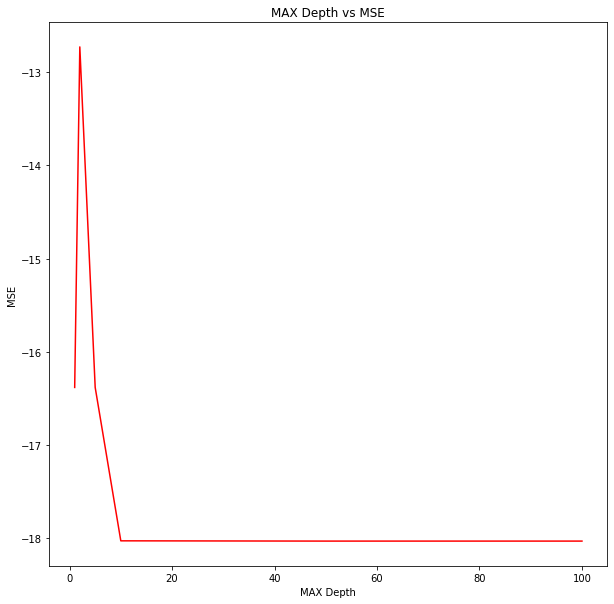

In [27]:


#1.5 Plot the natural logarithm of the MSE list as a function of max depth.

Max_De = [1, 2, 5, 10, 50, 100]
plt.figure(figsize = (10, 10))
plt.plot(Max_De, MSE, '-', color = 'red')
plt.xlabel('MAX Depth')
plt.ylabel('MSE')
plt.title('MAX Depth vs MSE')
plt.show()



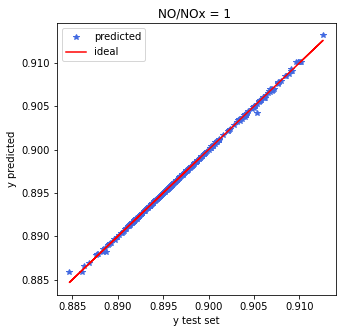

In [28]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'*', color='royalblue', label="predicted")
plt.plot(y_test, y_test, color='red', label="ideal")


plt.xlabel('y test set')
plt.ylabel('y predicted')
plt.legend()
plt.title('NO/NOx = 1 ')
plt.show()

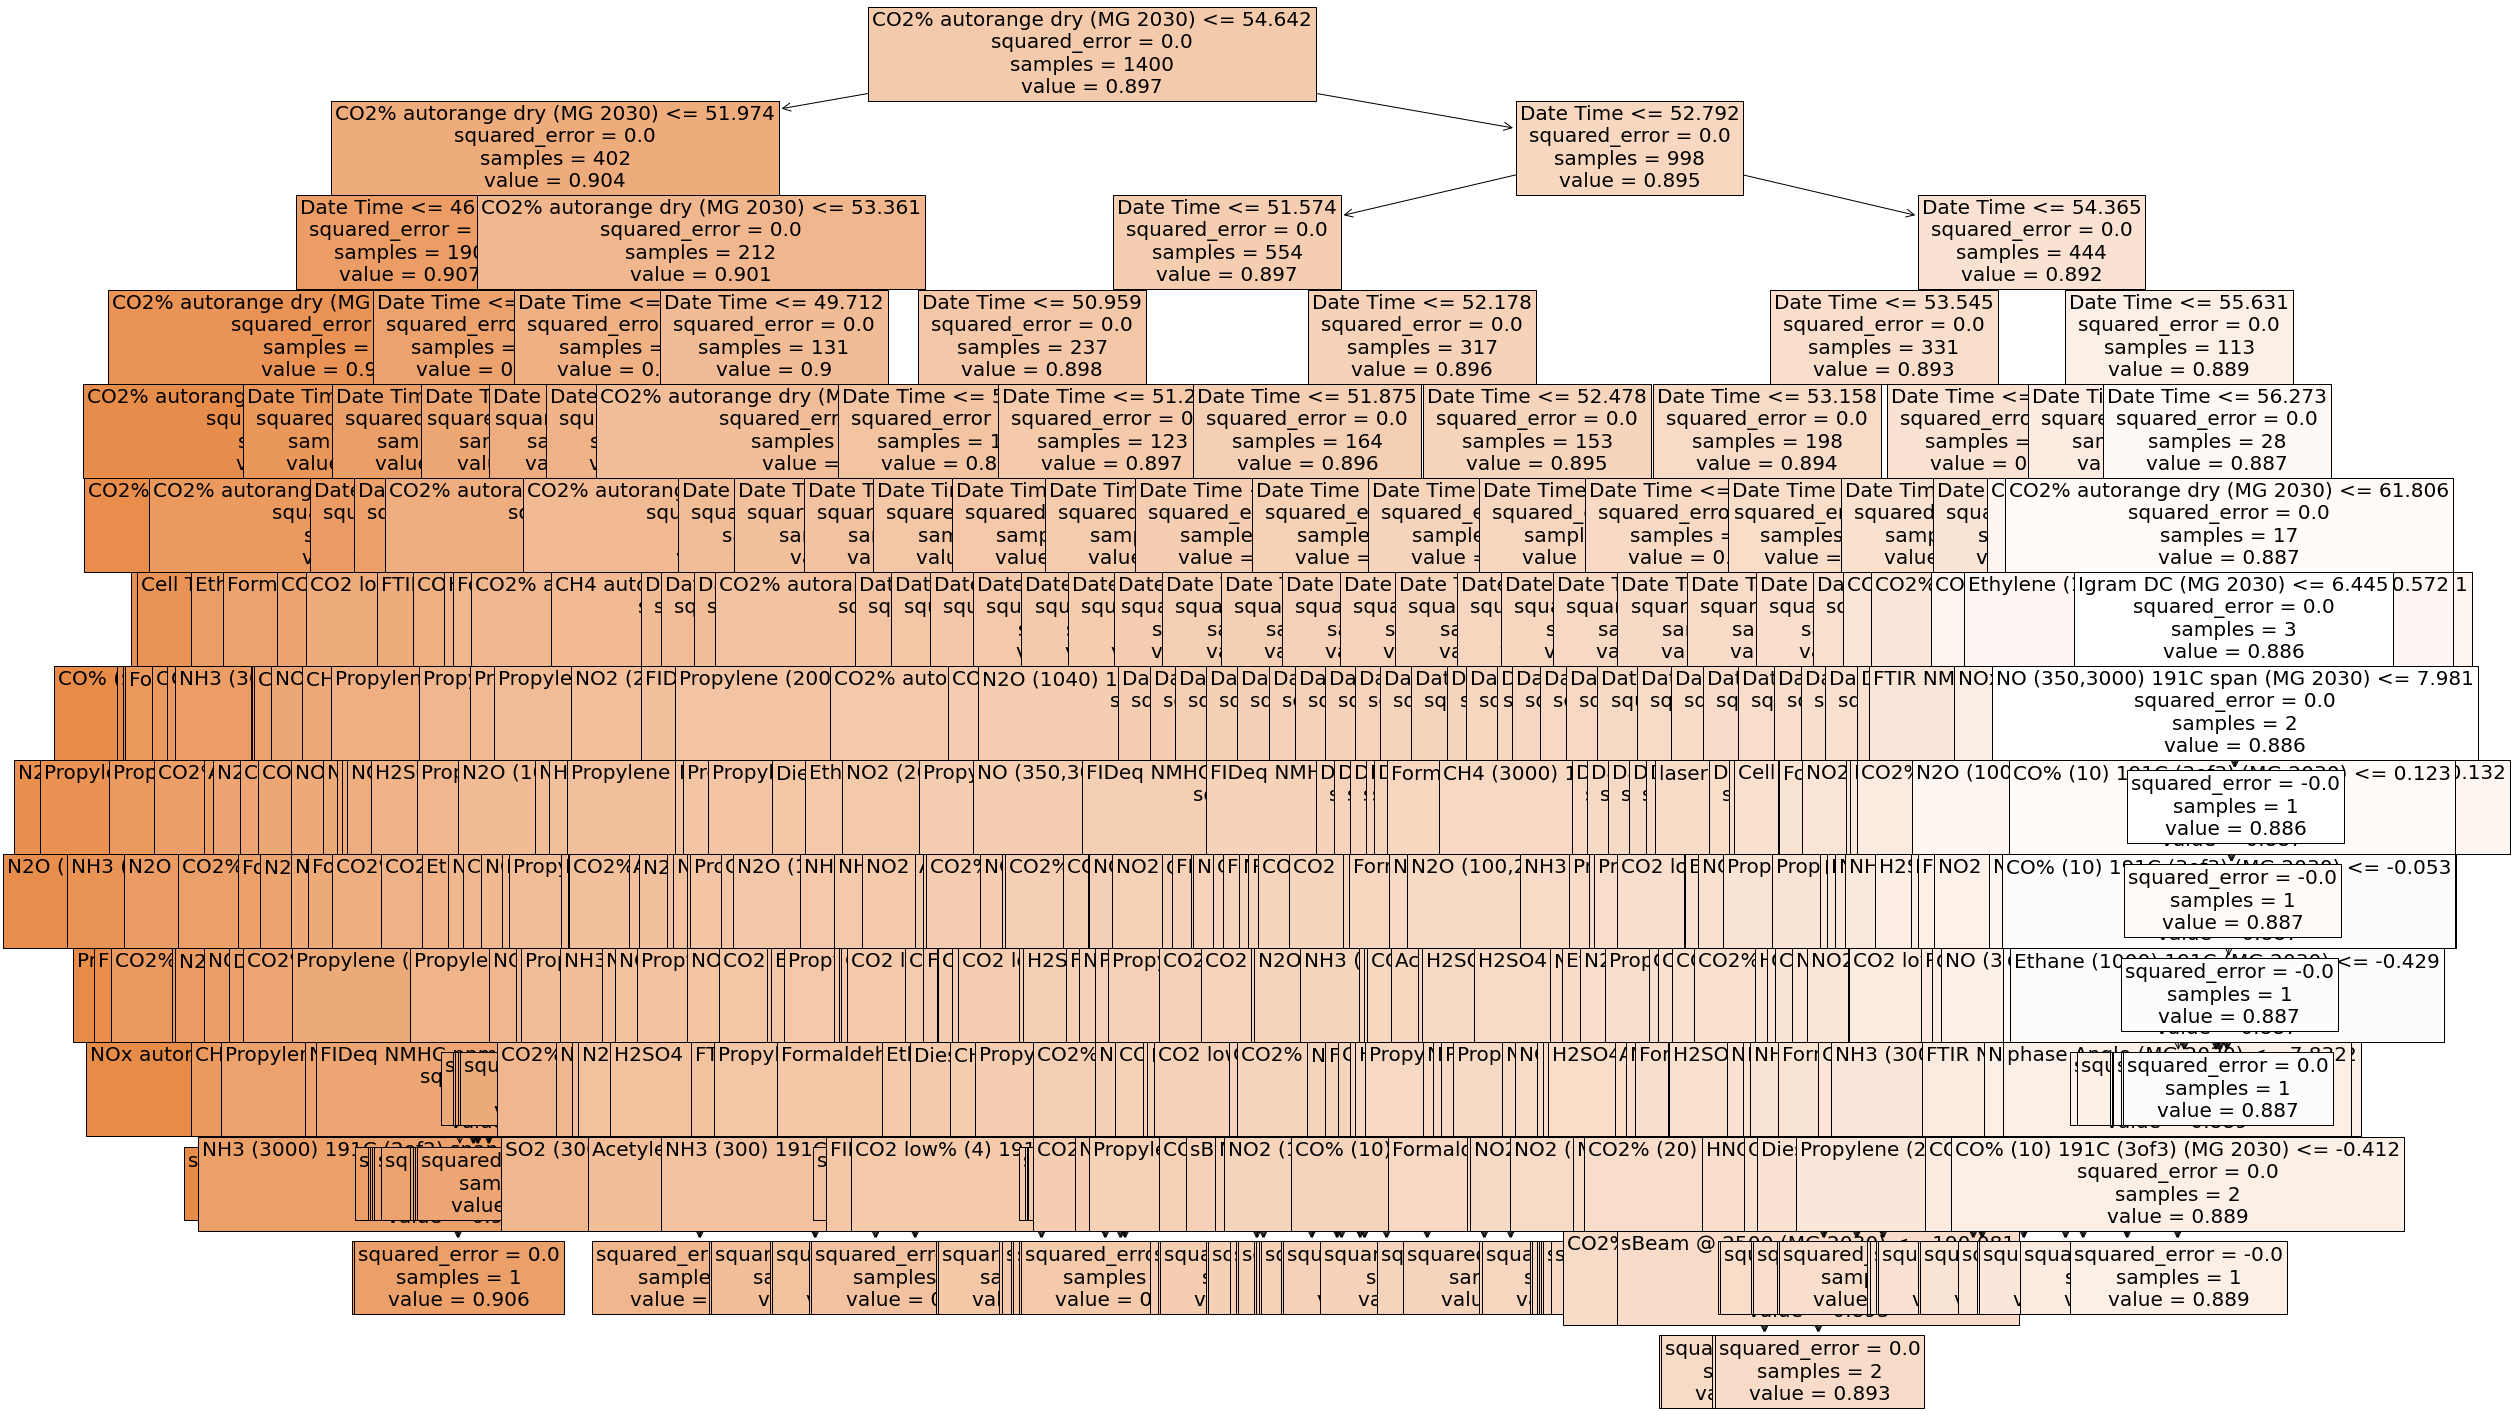

In [29]:
fig = plt.figure(figsize=(35,20))
tree.plot_tree(regr, feature_names=df.columns, filled=True, fontsize=20)
plt.tight_layout()

In [24]:
#2.1 Bagging regressor

MSE_Bagging = []

estimator = DecisionTreeClassifier(max_depth = 4)
y = y_train.values.ravel()
train_y = np.array(y).astype(int)

forest = [5, 10, 20, 50, 100, 300, 1000]

for i in forest:
    clf_bag = BaggingClassifier(base_estimator = estimator, n_estimators = i, random_state = 0)
    clf_bag = clf_bag.fit(X_train, train_y)
    y_BSTR = clf_bag.predict(X_test)
    MSE_B = mean_squared_error(y_test, y_BSTR)
    print("Prediction accuracy MSE of tree", i, "is", MSE_B)
    MSE_Bagging.append(MSE_B)

Prediction accuracy MSE of tree 5 is 0.8052349041662336
Prediction accuracy MSE of tree 10 is 0.8052349041662336
Prediction accuracy MSE of tree 20 is 0.8052349041662336
Prediction accuracy MSE of tree 50 is 0.8052349041662336
Prediction accuracy MSE of tree 100 is 0.8052349041662336
Prediction accuracy MSE of tree 300 is 0.8052349041662336
Prediction accuracy MSE of tree 1000 is 0.8052349041662336
